In [21]:
import re
import os
import pandas as pd
import numpy as np

In [22]:
files = []
for file in os.listdir("results/best_p_q"):
    if file.startswith("webkb"):
        print(file)
        files.append(file)

webkb_node2vec_avg_128_0.1_10.0.txt
webkb_node2vec_avg_128_10.0_0.1.txt
webkb_node2vec_avg_128_10.0_3.0.txt
webkb_node2vec_avg_128_0.1_1.0.txt
webkb_node2vec_avg_128_0.1_0.1.txt
webkb_node2vec_avg_128_3.0_10.0.txt
webkb_node2vec_avg_128_3.0_1.0.txt
webkb_node2vec_avg_128_0.3_3.0.txt
webkb_node2vec_avg_128_0.3_0.1.txt
webkb_node2vec_avg_128_1.0_0.1.txt
webkb_node2vec_avg_128_3.0_3.0.txt
webkb_node2vec_avg_128_0.3_0.3.txt
webkb_node2vec_avg_128_1.0_10.0.txt
webkb_node2vec_avg_128_0.1_0.3.txt
webkb_node2vec_avg_128_0.1_3.0.txt
webkb_node2vec_avg_128_3.0_0.3.txt
webkb_node2vec_avg_128_3.0_0.1.txt
webkb_node2vec_avg_128_0.3_1.0.txt
webkb_node2vec_avg_128_10.0_1.0.txt
webkb_node2vec_avg_128_0.3_10.0.txt
webkb_node2vec_avg_128_1.0_1.0.txt
webkb_node2vec_avg_128_1.0_0.3.txt
webkb_node2vec_avg_128_10.0_0.3.txt
webkb_node2vec_avg_128_10.0_10.0.txt
webkb_node2vec_avg_128_1.0_3.0.txt


In [23]:
filestr = files[0]
len(files)


25

In [24]:
matches = [re.match("webkb_node2vec_avg_128_(.*)_(.*).txt", file) for file in files]

p = [float(match.group(1)) for match in matches]
q = [float(match.group(2)) for match in matches]

In [25]:
pattern = r"Accuracy in training set:(.*)\nMacro:\(.*, .*, (.*), None\)\nMicro:\(.*, .*, (.*), None\)"

matches = []
for file in files:
    with open("results/best_p_q/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
train_acc = [float(match.group(1)) for match in matches]
train_macro_f1 = [float(match.group(2)) for match in matches]
train_micro_f1 = [float(match.group(3)) for match in matches]

In [27]:
pattern = r"Accuracy in testing set:(.*)\nMacro test:\(.*, .*, (.*), None\)\nMicro test:\(.*, .*, (.*), None\)"
match = re.search(pattern,filestr)

matches = []
for file in files:
    with open("results/best_p_q/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
acc = [float(match.group(1)) for match in matches]
macro_f1 = [float(match.group(2)) for match in matches]
micro_f1 = [float(match.group(3)) for match in matches]

In [28]:
d = {"p":p, "q":q, "acc":acc, "macro_f1":macro_f1, "micro_f1":micro_f1, "train_acc":train_acc, "train_macro_f1":train_macro_f1, "train_micro_f1":train_micro_f1}
df = pd.DataFrame(d)
# df.p = np.log(df.p)+3
# df.q = np.log(df.q)+3
df

,acc,macro_f1,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
0,0.851003,0.838276,0.851003,0.1,10.0,0.877988,0.865553,0.877988
1,0.852436,0.837789,0.852436,10.0,0.1,0.880128,0.868331,0.880128
2,0.868911,0.856146,0.868911,10.0,3.0,0.878345,0.866617,0.878345
3,0.858883,0.844541,0.858883,0.1,1.0,0.885480,0.875186,0.885480
4,0.858883,0.841928,0.858883,0.1,0.1,0.872636,0.859913,0.872636
5,0.848854,0.831060,0.848854,3.0,10.0,0.872636,0.860819,0.872636
6,0.840974,0.819245,0.840974,3.0,1.0,0.881199,0.868710,0.881199
7,0.856017,0.846072,0.856017,0.3,3.0,0.895469,0.889562,0.895469
8,0.853152,0.835056,0.853152,0.3,0.1,0.878701,0.868575,0.878701
9,0.850287,0.829767,0.850287,1.0,0.1,0.870139,0.857463,0.870139


In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [30]:
ax.scatter(df.p, df.q, df.acc)

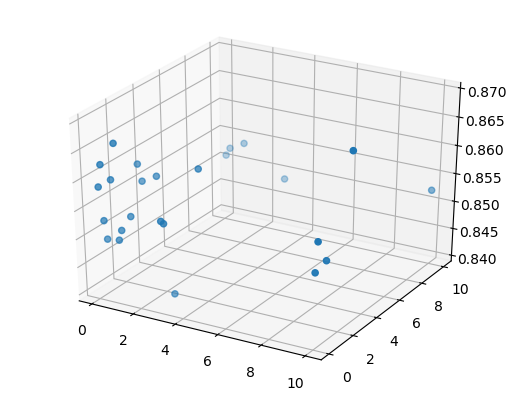

In [31]:
fig

In [32]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt


def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def func(data, a, alpha, beta):
    x = data[0]
    y = data[1]
    return a * (x**alpha) * (y**beta)

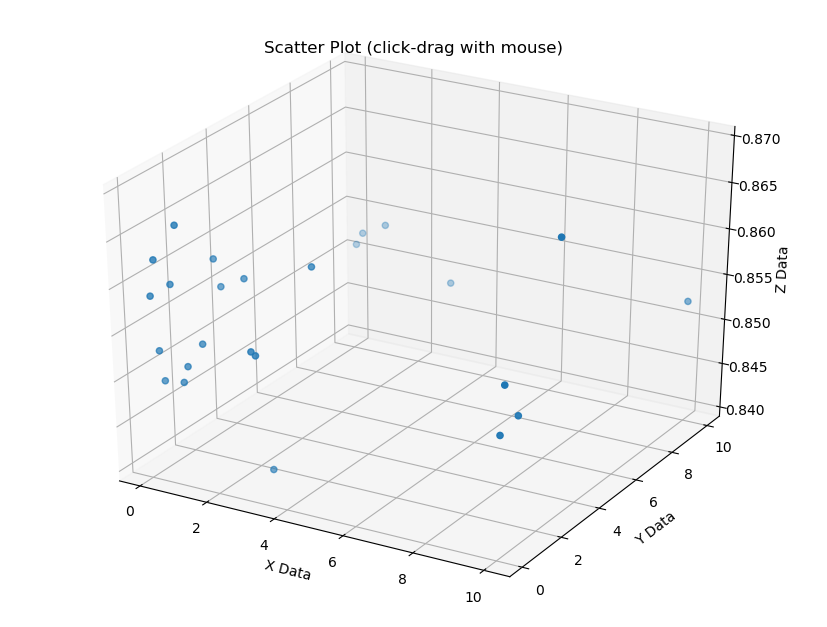

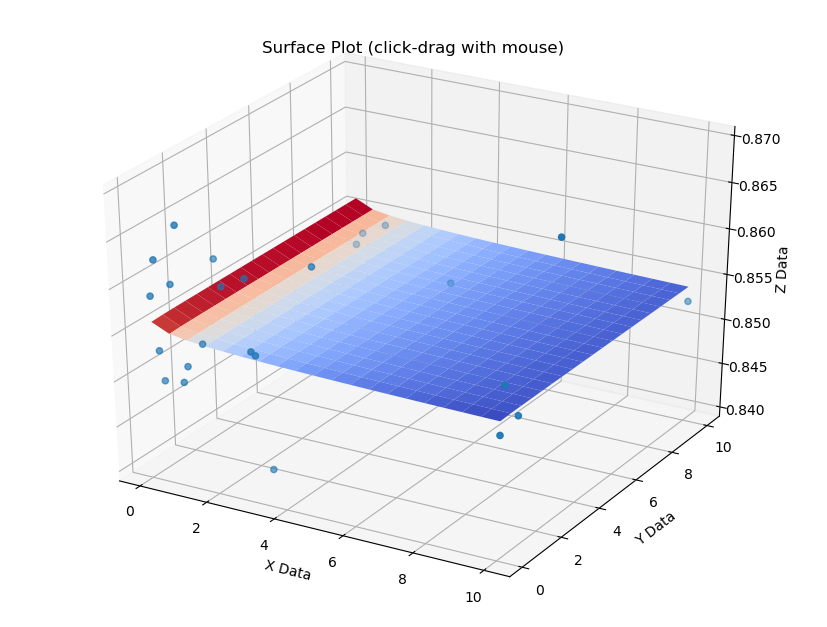

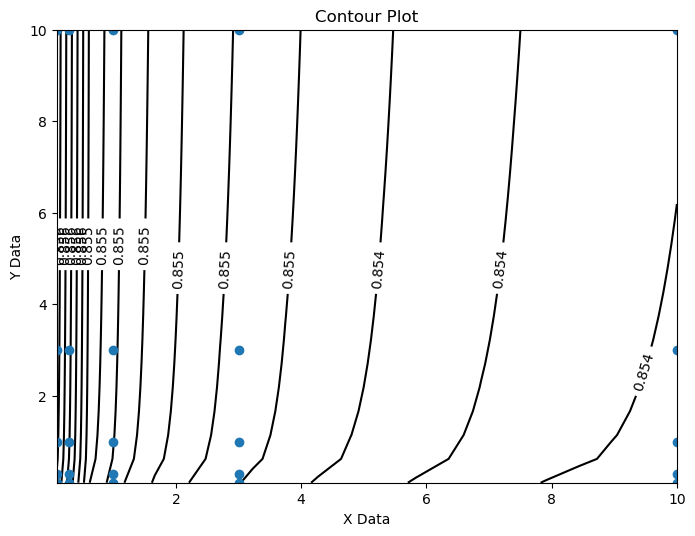

In [33]:
data = [df.p, df.q, df.acc]
initialParameters = [1.0, 1.0, 1.0]
graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16
fittedParameters, pcov = scipy.optimize.curve_fit(func, [df.p, df.q], df.acc, p0 = initialParameters)
ScatterPlot(data)
SurfacePlot(func, data, fittedParameters)
ContourPlot(func, data, fittedParameters)

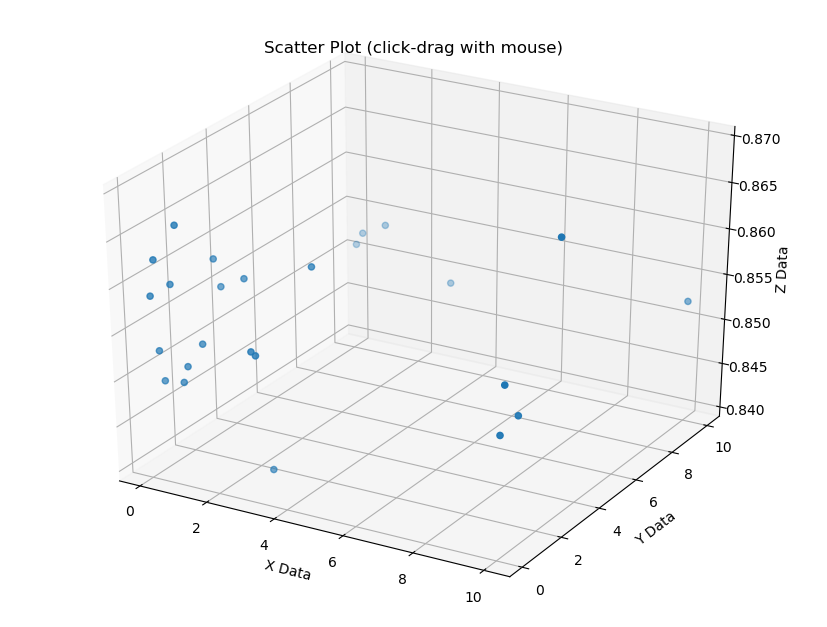

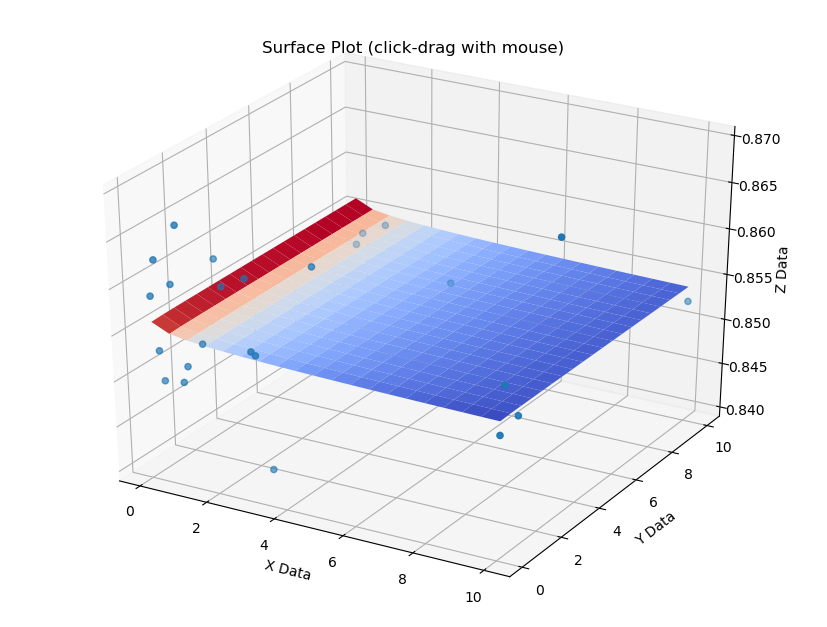

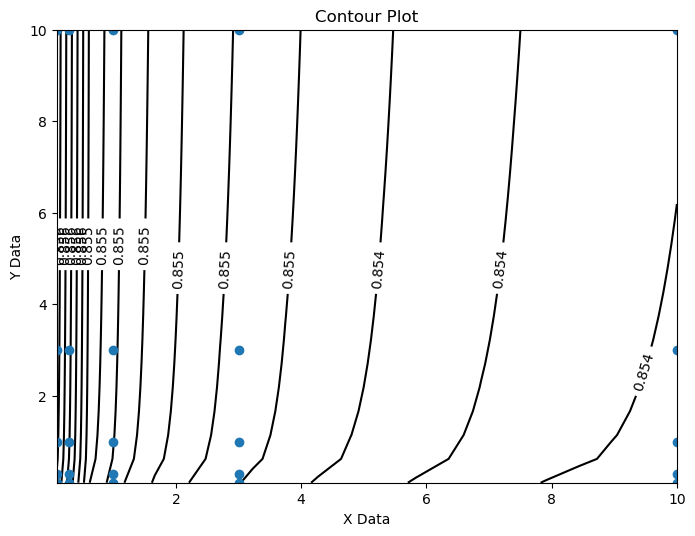

In [34]:
data = [df.p, df.q, df.acc]
initialParameters = [1.0, 1.0, 1.0]
graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16
fittedParameters, pcov = scipy.optimize.curve_fit(func, [df.p, df.q], df.acc, p0 = initialParameters)
ScatterPlot(data)
SurfacePlot(func, data, fittedParameters)
ContourPlot(func, data, fittedParameters)

In [35]:
df.describe()

,acc,macro_f1,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.855100,0.839417,0.855100,2.880000,2.880000,0.880913,0.870040,0.880913
std,0.005725,0.007998,0.005725,3.781204,3.781204,0.007319,0.009256,0.007319
min,0.840974,0.819245,0.840974,0.100000,0.100000,0.867285,0.851782,0.867285
25%,0.852436,0.833382,0.852436,0.300000,0.300000,0.876204,0.863779,0.876204
50%,0.853868,0.840022,0.853868,1.000000,1.000000,0.880128,0.868575,0.880128
75%,0.858883,0.843830,0.858883,3.000000,3.000000,0.886550,0.875186,0.886550
max,0.868911,0.856146,0.868911,10.000000,10.000000,0.895469,0.889562,0.895469


In [36]:
df['micro_f1'].argmax()

/home/sunxiaoyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


2

In [37]:
df.sort_values(by=['macro_f1'], ascending=False).head(3)

,acc,macro_f1,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1
2,0.868911,0.856146,0.868911,10.0,3.0,0.878345,0.866617,0.878345
17,0.865330,0.853171,0.865330,0.3,1.0,0.891545,0.884301,0.891545
13,0.862464,0.850220,0.862464,0.1,0.3,0.886550,0.873766,0.886550


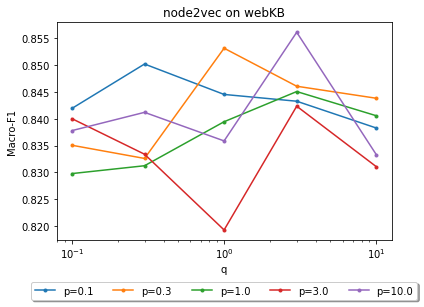

In [74]:
import matplotlib.pyplot as plt
p_list = [0.1, 0.3, 1, 3, 10]
for p in p_list:
    series = df[df.p==p].sort_values(by=['q'])
#     print(series)
    plt.plot(series.q,series.macro_f1,'.-', label='p=%.1f'%p)
plt.title("node2vec on webKB")
plt.ylabel('Macro-F1')
plt.xlabel('q')
plt.xscale("log")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17),shadow=True, ncol=5)
plt.savefig('best_p_q_arranged_p.png', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
df["p_q"] = (df.p/df.q)

In [55]:
df["ln_p_q"] = np.around(np.log(df.p/df.q)/np.log(3))
df.ln_p_q

0    -4.0
1     4.0
2     1.0
3    -2.0
4     0.0
5    -1.0
6     1.0
7    -2.0
8     1.0
9     2.0
10    0.0
11    0.0
12   -2.0
13   -1.0
14   -3.0
15    2.0
16    3.0
17   -1.0
18    2.0
19   -3.0
20    0.0
21    1.0
22    3.0
23    0.0
24   -1.0
Name: ln_p_q, dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
acc               25 non-null float64
macro_f1          25 non-null float64
micro_f1          25 non-null float64
p                 25 non-null float64
q                 25 non-null float64
train_acc         25 non-null float64
train_macro_f1    25 non-null float64
train_micro_f1    25 non-null float64
p_q               25 non-null float64
ln_p_q            25 non-null float64
dtypes: float64(10)
memory usage: 2.0 KB


In [57]:
ln_p_q_list = sorted(df.ln_p_q.unique())
ln_p_q_list

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

In [58]:
df

,acc,macro_f1,micro_f1,p,q,train_acc,train_macro_f1,train_micro_f1,p_q,ln_p_q
0,0.851003,0.838276,0.851003,0.1,10.0,0.877988,0.865553,0.877988,0.010000,-4.0
1,0.852436,0.837789,0.852436,10.0,0.1,0.880128,0.868331,0.880128,100.000000,4.0
2,0.868911,0.856146,0.868911,10.0,3.0,0.878345,0.866617,0.878345,3.333333,1.0
3,0.858883,0.844541,0.858883,0.1,1.0,0.885480,0.875186,0.885480,0.100000,-2.0
4,0.858883,0.841928,0.858883,0.1,0.1,0.872636,0.859913,0.872636,1.000000,0.0
5,0.848854,0.831060,0.848854,3.0,10.0,0.872636,0.860819,0.872636,0.300000,-1.0
6,0.840974,0.819245,0.840974,3.0,1.0,0.881199,0.868710,0.881199,3.000000,1.0
7,0.856017,0.846072,0.856017,0.3,3.0,0.895469,0.889562,0.895469,0.100000,-2.0
8,0.853152,0.835056,0.853152,0.3,0.1,0.878701,0.868575,0.878701,3.000000,1.0
9,0.850287,0.829767,0.850287,1.0,0.1,0.870139,0.857463,0.870139,10.000000,2.0


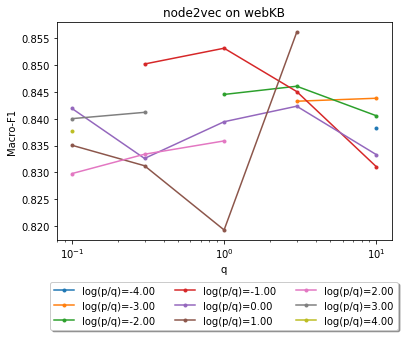

In [73]:
for ln_p_q in ln_p_q_list:
    series = df[df.ln_p_q==ln_p_q].sort_values(by=['q'])
#     print(series)
    plt.plot(series.q,series.macro_f1,'.-', label='log(p/q)=%.2f'%ln_p_q)
plt.title("node2vec on webKB")
plt.ylabel('Macro-F1')
plt.xlabel('q')
plt.xscale("log")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.17),shadow=True, ncol=3)
plt.savefig('best_p_q_arranged_by_ratio.png', dpi=300, bbox_inches='tight')
plt.show()

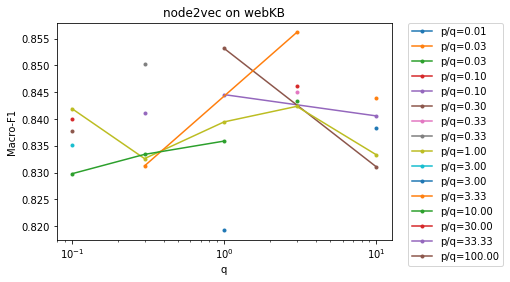

In [50]:
for p_q in p_q_list:
    series = df[df.p_q==p_q].sort_values(by=['q'])
#     print(series)
    plt.plot(series.q,series.macro_f1,'.-', label='p/q=%.2f'%p_q)
plt.title("node2vec on webKB")
plt.ylabel('Macro-F1')
plt.xlabel('q')
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('best_p_q.png', dpi=300, bbox_inches='tight')
plt.show()